# Dynamic Programming Lecture 2

#### John Stachurski

#### October 2017

See the [set up page](https://lectures.quantecon.org/py/getting_started.html) to install Jupyter, Python and all necessary libraries

# A Stochastic Optimal Growth Model

## Contents

- [A Stochastic Optimal Growth Model](#A-Stochastic-Optimal-Growth-Model)  
  - [Overview](#Overview)  
  - [The Model](#The-Model)  
  - [Computation](#Computation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In this lecture we're going to study a simple optimal growth model with one agent

The model is a version of the standard one sector infinite horizon growth model studied in

- [[SLP89]](zreferences.ipynb#stokeylucas1989), chapter 2  
- [[LS12]](zreferences.ipynb#ljungqvist2012), section 3.1  
- [EDTC](http://johnstachurski.net/edtc.html), chapter 1  
- [[Sun96]](zreferences.ipynb#sundaram1996), chapter 12  


The technique we use to solve the model is **dynamic programming**

Our treatment of dynamic programming follows on from earlier
treatments in our lectures on [shortest paths](short_path.ipynb#) and
[job search](mccall_model.ipynb#)

We'll discuss some of the technical details of dynamic programming as we
go along

## The Model


<a id='index-1'></a>
Consider an agent who owns an amount $ y_t \in \mathbb R_+ := [0, \infty) $ of a consumption good at time $ t $

This output can either be consumed or invested

When the good is invested it is transformed one-for-one into capital

The resulting capital stock, denoted here by $ k_t $, will then be used for production

Production is stochastic, in that it also depends on a shock $ \xi_{t+1} $ realized at the end of the current period

Next period output is

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
y_{t+1} := f(k_t) \xi_{t+1}
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>where $ f \colon \mathbb R_+ \to \mathbb R_+ $ is called the production function

The resource constraint is


<a id='equation-outcsdp0'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
k_t + c_t \leq y_t
$$

</td><td width=25% style='text-align:center !important;'>(1)</td></tr></table>and all variables are required to be nonnegative

### Assumptions and Comments

In what follows,

- The sequence $ \{\xi_t\} $ is assumed to be IID  
- The common distribution of each $ \xi_t $ will be denoted $ \phi $  
- The production function $ f $ is assumed to be increasing and continuous  
- Depreciation of capital is not made explicit but can be incorporated into the production function  


While many other treatments of the stochastic growth model use $ k_t $ as the state variable, we will use $ y_t $

This will allow us to treat a stochastic model while maintaining only one state variable

We consider alternative states and timing specifications in some of our other lectures

### Optimization

Taking $ y_0 $ as given, the agent wishes to maximize


<a id='equation-texs0_og2'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
\mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(c_t) \right]
$$

</td><td width=25% style='text-align:center !important;'>(2)</td></tr></table>subject to


<a id='equation-og_conse'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
y_{t+1} = f(y_t - c_t) \xi_{t+1}
\quad \text{and} \quad
0 \leq c_t \leq y_t
\quad \text{for all } t
$$

</td><td width=25% style='text-align:center !important;'>(3)</td></tr></table>where

- $ u $ is a bounded, continuous and strictly increasing utility function and  
- $ \beta \in (0, 1) $ is a discount factor  


In [(3)](#equation-og_conse) we are assuming that the resource constraint [(1)](#equation-outcsdp0) holds with equality --- which is reasonable because $ u $ is strictly increasing and no output will be wasted at the optimum

In summary, the agent's aim is to select a path $ c_0, c_1, c_2, \ldots $ for consumption that is

1. nonnegative,  
1. feasible in the sense of [(1)](#equation-outcsdp0),  
1. optimal, in the sense that it maximizes [(2)](#equation-texs0_og2) relative to all other feasible consumption sequences, and  
1. *adapted*, in the sense that the action $ c_t $ depends only on
   observable outcomes, not future outcomes such as $ \xi_{t+1} $  


In the present context

- $ y_t $ is called the *state* variable --- it summarizes the "state of the world" at the start of each period  
- $ c_t $ is called the *control* variable --- a value chosen by the agent each period after observing the state  

### The Policy Function Approach


<a id='index-2'></a>
One way to think about solving this problem is to look for the best **policy function**

A policy function is a map from past and present observables into current action

We'll be particularly interested in **Markov policies**, which are maps from the current state $ y_t $ into a current action $ c_t $

For dynamic programming problems such as this one (in fact for any [Markov decision process](https://en.wikipedia.org/wiki/Markov_decision_process)), the optimal policy is always a Markov policy

In other words, the current state $ y_t $ provides a sufficient statistic
for the history in terms of making an optimal decision today

This is quite intuitive but if you wish you can find proofs in texts such as [[SLP89]](zreferences.ipynb#stokeylucas1989) (section 4.1)

Hereafter we focus on finding the best Markov policy

In our context, a Markov policy is a function $ \sigma \colon
\mathbb R_+ \to \mathbb R_+ $, with the understanding that states are mapped to actions via

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
c_t = \sigma(y_t) \quad \text{for all } t
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>In what follows, we will call $ \sigma $ a *feasible consumption policy* if it satisfies


<a id='equation-idp_fp_og2'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
0 \leq \sigma(y) \leq y
\quad \text{for all} \quad
y \in \mathbb R_+
$$

</td><td width=25% style='text-align:center !important;'>(4)</td></tr></table>In other words, a feasible consumption policy is a Markov policy that respects the resource constraint

The set of all feasible consumption policies will be denoted by $ \Sigma $

Each $ \sigma \in \Sigma $ determines a [continuous state Markov process](stationary_densities.ipynb#) $ \{y_t\} $ for output via


<a id='equation-firstp0_og2'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
y_{t+1} = f(y_t - \sigma(y_t)) \xi_{t+1},
\quad y_0 \text{ given}
$$

</td><td width=25% style='text-align:center !important;'>(5)</td></tr></table>This is the time path for output when we choose and stick with the policy $ \sigma $


Here's an example of two policies, $\sigma_1$ and $\sigma_2$, when 

* $f(k) = k^{0.4}$
* the shocks are lognormal

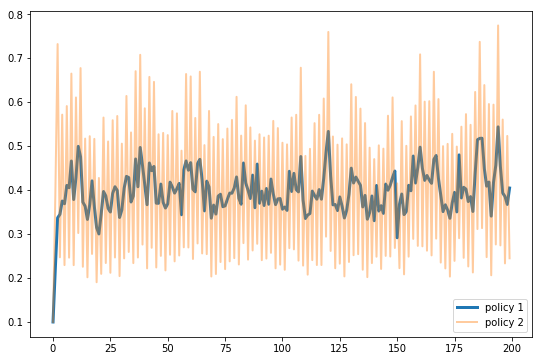

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f(k):
    return k**0.4

def σ1(y):
    return 0.75 * y

def σ2(y):
    return 0 if y < 0.4 else 0.95 * y

ts_length = 200
y_vals1, y_vals2 = [], []
y1, y2 = 0.1, 0.1

for t in range(ts_length):
    y_vals1.append(y1)
    y_vals2.append(y2)
    ξ = np.exp(0.1 * np.random.randn())
    y1 = f(y1 - σ1(y1)) * ξ
    y2 = f(y2 - σ2(y2)) * ξ
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(y_vals1, label="policy 1", lw=3)
ax.plot(y_vals2, label="policy 2", lw=2, alpha=0.4)

ax.legend()
plt.show()

Which looks better to you?  Which one do you think this agent will prefer?

### Optimality

The **policy value function** $ v_{\sigma} $ associated with a given policy $ \sigma $ is the mapping defined by


<a id='equation-vfcsdp00'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
v_{\sigma}(y)
=
\mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(\sigma(y_t)) \right]
$$

</td><td width=25% style='text-align:center !important;'>(7)</td></tr></table>when $ \{y_t\} $ is given by [(5)](#equation-firstp0_og2) with $ y_0 = y $

In other words, it is the lifetime value of following policy $ \sigma $
starting at initial condition $ y $

The **value function** is then defined as


<a id='equation-vfcsdp0'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
v^*(y) := \sup_{\sigma \in \Sigma} \; v_{\sigma}(y)
$$

</td><td width=25% style='text-align:center !important;'>(8)</td></tr></table>The value function gives the maximal value that can be obtained from state $ y $, after considering all feasible policies

A policy $ \sigma \in \Sigma $ is called **optimal** if it attains the supremum in [(8)](#equation-vfcsdp0) for all $ y \in \mathbb R_+ $

### The Bellman Equation

With our assumptions on utility and production function, the value function as defined in [(8)](#equation-vfcsdp0) also satisfies a **Bellman equation**

For this problem, the Bellman equation takes the form


<a id='equation-fpb30'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
w(y) = \max_{0 \leq c \leq y}
    \left\{
        u(c) + \beta \int w(f(y - c) z) \phi(dz)
    \right\}
\qquad (y \in \mathbb R_+)
$$

</td><td width=25% style='text-align:center !important;'>(9)</td></tr></table>This is a *functional equation in* $ w $

The term $ \int w(f(y - c) z) \phi(dz) $ can be understood as the expected next period value when

- $ w $ is used to measure value  
- the state is $ y $  
- consumption is set to $ c $  


As shown in [EDTC](http://johnstachurski.net/edtc.html), theorem 10.1.11 and a range of other texts

*The value function* $ v^* $ *satisfies the Bellman equation*

In other words, [(9)](#equation-fpb30) holds when $ w=v^* $

The intuition is that maximal value from a given state can be obtained by optimally trading off

- current reward from a given action, vs  
- expected discounted future value of the state resulting from that action  


The Bellman equation is important because it gives us more information about the value function

It also suggests a way of computing the value function, which we discuss below

### Greedy policies

The primary importance of the value function is that we can use it to compute optimal policies

The details are as follows

Given a continuous function $ w $ on $ \mathbb R_+ $, we say that $ \sigma \in \Sigma $ is $ w $-**greedy** if $ \sigma(y) $ is a solution to


<a id='equation-defgp20'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
\max_{0 \leq c \leq y}
    \left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
    \right\}
$$

</td><td width=25% style='text-align:center !important;'>(10)</td></tr></table>for every $ y \in \mathbb R_+ $

In other words, $ \sigma \in \Sigma $ is $ w $-greedy if it optimally
trades off current and future rewards when $ w $ is taken to be the value
function

In our setting, we have the following key result

*A feasible consumption  policy is optimal if and only if it is* $ v^* $-*greedy*

The intuition is similar to the intuition for the Bellman equation, which was
provided after [(9)](#equation-fpb30)

See, for example, theorem 10.1.11 of [EDTC](http://johnstachurski.net/edtc.html)

Hence, once we have a good approximation to $ v^* $, we can compute the (approximately) optimal policy by computing the corresponding greedy policy

The advantage is that we are now solving a much lower dimensional optimization
problem

### The Bellman Operator

How, then, should we compute the value function?

One way is to use the so-called **Bellman operator**

(An operator is a map that sends functions into functions)

The Bellman operator is denoted by $ T $ and defined by


<a id='equation-fcbell20_optgrowth'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
Tw(y) := \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\}
\qquad (y \in \mathbb R_+)
$$

</td><td width=25% style='text-align:center !important;'>(11)</td></tr></table>In other words, $ T $ sends the function $ w $ into the new function
$ Tw $ defined [(11)](#equation-fcbell20_optgrowth)

By construction, the set of solutions to the Bellman equation [(9)](#equation-fpb30) *exactly coincides with* the set of fixed points of $ T $

For example, if $ Tw = w $, then, for any $ y \geq 0 $,

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
w(y)
= Tw(y)
= \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
\right\}
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>which says precisely that $ w $ is a solution to the Bellman equation

It follows that $ v^* $ is a fixed point of $ T $

### Review of Theoretical Results


<a id='index-3'></a>
One can also show that $ T $ is a contraction mapping on the set of continuous bounded functions on $ \mathbb R_+ $ under the supremum distance

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
\rho(g, h) = \sup_{y \geq 0} |g(y) - h(y)|
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>See  [EDTC](http://johnstachurski.net/edtc.html), lemma 10.1.18

Hence it has exactly one fixed point in this set, which we know is equal to the value function

It follows that

- The value function $ v^* $ is bounded and continuous  
- Starting from any bounded and continuous $ w $, the sequence $ w, Tw, T^2 w, \ldots $ generated by iteratively applying $ T $ converges uniformly to $ v^* $  


This iterative method is called **value function iteration**

We also know that a feasible policy is optimal if and only if it is $ v^* $-greedy

It's not too hard to show that a $ v^* $-greedy policy exists (see  [EDTC](http://johnstachurski.net/edtc.html), theorem 10.1.11 if you get stuck)

Hence at least one optimal policy exists

Our problem now is how to compute it

### Unbounded Utility


<a id='index-5'></a>
The results stated above assume that the utility function is bounded

In practice economists often work with unbounded utility functions --- and so will we

In the unbounded setting, various optimality theories exist

Unfortunately, they tend to be case specific, as opposed to valid for a large range of applications

Nevertheless, their main conclusions are usually in line with those stated for
the bounded case just above (as long as we drop the word "bounded")

Consult,  for example, section 12.2 of [EDTC](http://johnstachurski.net/edtc.html), [[Kam12]](zreferences.ipynb#kamihigashi2012) or [[MdRV10]](zreferences.ipynb#mv2010)

## Computation


<a id='index-6'></a>
Let's now look at computing the value function and the optimal policy

### Fitted Value Iteration


<a id='index-7'></a>
The first step is to compute the value function by value function iteration

In theory, the algorithm is as follows

1. Begin with a function $ w $ --- an initial condition  
1. Solving [(11)](#equation-fcbell20_optgrowth), obtain the function $ T w $  
1. Unless some stopping condition is satisfied, set $ w = Tw $ and go to step 2  


This generates the sequence $ w, Tw, T^2 w, \ldots $

However, there is a problem we must confront before we implement this procedure: The iterates can neither be calculated exactly nor stored on a computer

To see the issue, consider [(11)](#equation-fcbell20_optgrowth)

Even if $ w $ is a known function, unless $ Tw $ can be shown to have
some special structure, the only way to store it is to record the
value $ Tw(y) $ for every $ y \in \mathbb R_+ $

Clearly this is impossible

What we will do instead is use **fitted value function iteration**

The procedure is to record the value of the function $ Tw $ at only finitely many "grid" points $ y_1 < y_2 < \cdots < y_I $ and reconstruct it from this information when required

More precisely, the algorithm will be


<a id='fvi-alg'></a>
1. Begin with an array of values $ \{ w_1, \ldots, w_I \} $ representing the values of some initial function $ w $ on the grid points $ \{ y_1, \ldots, y_I \} $  
1. Build a function $ \hat w $ on the state space $ \mathbb R_+ $ by interpolation or approximation, based on these data points  
1. Obtain and record the value $ T \hat w(y_i) $ on each grid point $ y_i $ by repeatedly solving [(11)](#equation-fcbell20_optgrowth)  
1. Unless some stopping condition is satisfied, set $ \{ w_1, \ldots, w_I \} = \{ T \hat w(y_1), \ldots, T \hat w(y_I) \} $ and go to step 2  


How should we go about step 2?

This is a problem of function approximation, and there are many ways to approach it

What's important here is that the function approximation scheme must not only produce a good approximation to $ Tw $, but also combine well with the broader iteration algorithm described above

The next figure illustrates piecewise linear interpolation of an arbitrary function on grid points $ 0, 0.2, 0.4, 0.6, 0.8, 1 $

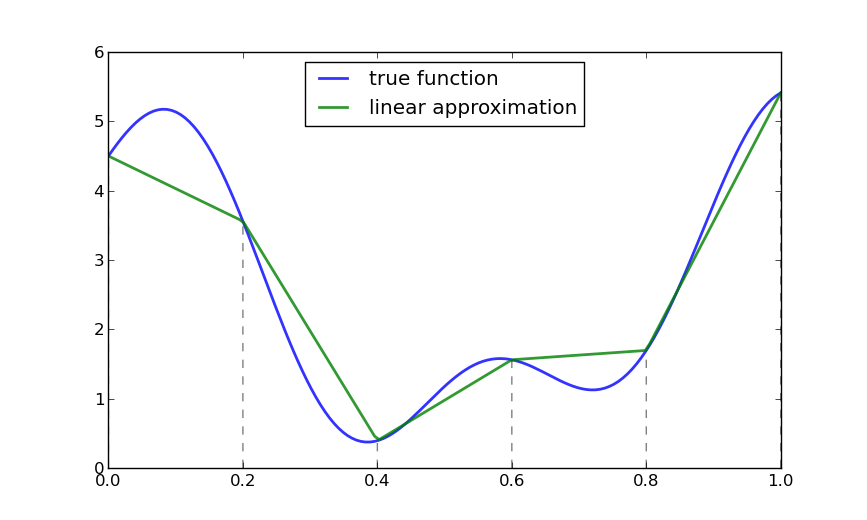

In [1]:
from IPython.display import Image
Image("linapprox.png", width=600)

 
Another advantage of piecewise linear interpolation is that it preserves useful shape properties such as monotonicity and concavity / convexity

### The Bellman Operator

Here's a function that implements the Bellman operator using linear interpolation

In [2]:

from scipy.optimize import fminbound


def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    """
    The approximate Bellman operator, which computes and returns the
    updated value function Tw on the grid points.  An array to store
    the new set of values Tw is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.

    Parameters
    ----------
    w : array_like(float, ndim=1)
        The value of the input function on different grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u : function
        The utility function
    f : function
        The production function
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Tw : array_like(float, ndim=1) optional (default=None)
        Array to write output values to
    compute_policy : Boolean, optional (default=False)
        Whether or not to compute policy function

    """
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw

The arguments to bellman_operator are described in the docstring to the function

Notice that the expectation in [(11)](#equation-fcbell20_optgrowth) is computed via Monte Carlo, using the approximation

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
\int w(f(y - c) z) \phi(dz) \approx \frac{1}{n} \sum_{i=1}^n w(f(y - c) \xi_i)
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>where $ \{\xi_i\}_{i=1}^n $ are IID draws from $ \phi $

Monte Carlo is not always the most efficient way to compute integrals numerically but it does have some theoretical advantages in the present setting

(For example, it preserves the contraction mapping property of the Bellman operator --- see, e.g., [[PalS13]](zreferences.ipynb#pal2013))


<a id='benchmark-growth-mod'></a>

### An Example

Let's test out our operator when

- $ f(k) = k^{\alpha} $  
- $ u(c) = \ln c $  
- $ \phi $ is the distribution of $ \exp(\mu + \sigma \zeta) $ when $ \zeta $ is standard normal  


As is well-known (see [[LS12]](zreferences.ipynb#ljungqvist2012), section 3.1.2), for this particular problem an exact analytical solution is available, with


<a id='equation-dpi_tv'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
v^*(y) =
\frac{\ln (1 - \alpha \beta) }{ 1 - \beta}
+
\frac{(\mu + \alpha \ln (\alpha \beta))}{1 - \alpha}
 \left[
     \frac{1}{1- \beta} - \frac{1}{1 - \alpha \beta}
 \right]
 +
 \frac{1}{1 - \alpha \beta} \ln y
$$

</td><td width=25% style='text-align:center !important;'>(12)</td></tr></table>The optimal consumption policy is

<table width=100%><tr style='background-color: #FFFFFF !important;'><td width=75%>$$
\sigma^*(y) = (1 - \alpha \beta ) y
$$

</td><td width=25% style='text-align:center !important;'></td></tr></table>Let's wrap this model in a class because we'll use it some later lectures too

In [3]:
class LogLinearOG:
    """
    Log linear optimal growth model, with log utility, CD production and
    multiplicative lognormal shock, so that

        y = f(k, z) = z k^alpha

    with z ~ LN(mu, s).

    The class holds parameters and true value and policy functions.
    """

    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)

### A First Test

To test our code, we want to see if we can replicate the analytical solution numerically, using fitted value function iteration

First, having run the code for the log linear model shown above, let's
generate an instance

In [4]:
lg = LogLinearOG()
# == Unpack parameters / functions for convenience == #
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s
v_star = lg.v_star

We need a grid and some shock draws for Monte Carlo integration

In [5]:
grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

Now let's do some tests

In the code shown below and all other code, we assume that you've already run
the code above

As one preliminary test, let's see what happens when we apply our Bellman operator to the exact solution $ v^* $

In theory, the resulting function should again be $ v^* $

In practice we expect some small numerical error

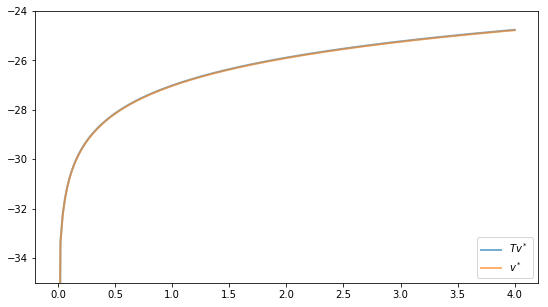

In [7]:
w = bellman_operator(v_star(grid),
                     grid,
                     beta,
                     np.log,
                     lambda k: k**alpha,
                     shocks)

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(-35, -24)
ax.plot(grid, w, lw=2, alpha=0.6, label=r'$Tv^*$')
ax.plot(grid, v_star(grid), lw=2, alpha=0.6, label='$v^*$')
ax.legend(loc='lower right')
plt.show()

Here's the output:

![_static/figures/bellman_to_vstar.png](_static/figures/bellman_to_vstar.png)  
The two functions are essentially indistinguishable, so we are off to a good start

Now let's have a look at iterating with the Bellman operator, starting off
from an arbitrary initial condition

The initial condition we'll start with is $ w(y) = 5 \ln (y) $

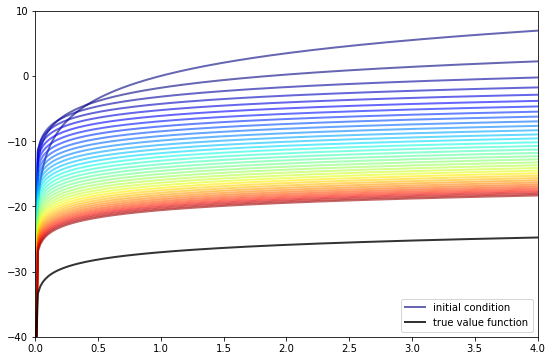

In [8]:
w = 5 * np.log(grid)  # An initial condition
n = 35
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-40, 10)
ax.set_xlim(np.min(grid), np.max(grid))
lb = 'initial condition'
ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
for i in range(n):
    w = bellman_operator(w,
                         grid,
                         beta,
                         np.log,
                         lambda k: k**alpha,
                         shocks)

    ax.plot(grid, w, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

lb = 'true value function'
ax.plot(grid, v_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
ax.legend(loc='lower right')

plt.show()


The figure shows

1. the first 36 functions generated by the fitted value function iteration algorithm, with hotter colors given to higher iterates  
1. the true value function $ v^* $ drawn in black  


The sequence of iterates converges towards $ v^* $

We are clearly getting closer

Let's try a more serious attempt to converge to $ v^* $, using QuantEcon's
compute_fixed_point function

In [9]:
from quantecon import compute_fixed_point

Tw = np.empty(len(grid))
initial_w = 5 * np.log(grid)

# Turn the Bellman operator into a function of one variable
T = lambda w: bellman_operator(w,
                               grid,
                               beta,
                               np.log,
                               lambda k: k**alpha,
                               shocks,
                               compute_policy=False)

v_star_approx = compute_fixed_point(T, initial_w,
                                    error_tol=1e-5,  # error_tol
                                    max_iter=500,   # max_iter
                                    verbose=2,  # verbose
                                    print_skip=10,     # print_skip
                                    method='iteration')

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           6.959e-01      9.716e-01         
20           4.621e-01      1.952e+00         
30           3.072e-01      2.922e+00         
40           2.043e-01      3.888e+00         
50           1.358e-01      4.851e+00         
60           9.029e-02      5.824e+00         
70           6.002e-02      6.793e+00         
80           3.991e-02      7.759e+00         
90           2.653e-02      8.733e+00         
100          1.764e-02      9.705e+00         
110          1.173e-02      1.068e+01         
120          7.796e-03      1.166e+01         
130          5.183e-03      1.262e+01         
140          3.446e-03      1.359e+01         
150          2.291e-03      1.456e+01         
160          1.523e-03      1.553e+01         
170          1.013e-03      1.651e+01         
180          6.732e-04      1.746e+01         
190          4.476e-04      1.843e+01         
200          2.

Let's have a look at the result

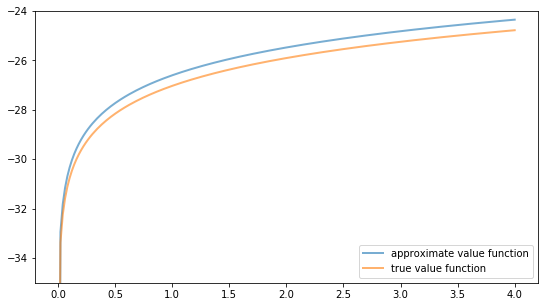

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(-35, -24)
ax.plot(grid, v_star_approx, lw=2, alpha=0.6, label='approximate value function')
ax.plot(grid, v_star(grid), lw=2, alpha=0.6, label='true value function')
ax.legend(loc='lower right')
plt.show()

 The figure shows that we are pretty much on the money

### The Policy Function


<a id='index-8'></a>
To compute an approximate optimal policy, we take the approximate value
function we just calculated and then compute the corresponding greedy policy

The next figure compares the result to the exact solution, which, as mentioned
above, is $ \sigma(y) = (1 - \alpha \beta) y $

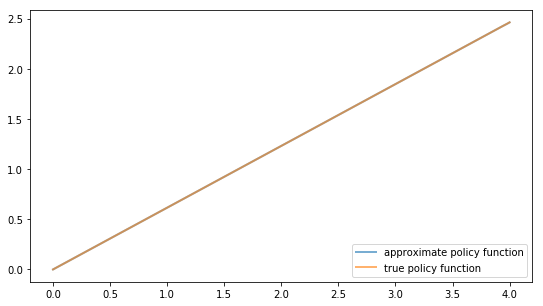

In [11]:
Tw, sigma = bellman_operator(v_star_approx,
                            grid,
                            beta,
                            np.log,
                            lambda k: k**alpha,
                            shocks,
                            compute_policy=True)


fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(grid, sigma, lw=2, alpha=0.6, label='approximate policy function')
cstar = (1 - alpha * beta) * grid
ax.plot(grid, cstar, lw=2, alpha=0.6, label='true policy function')
ax.legend(loc='lower right')
plt.show()

 
The figure shows that we've done a good job in this instance of approximating
the true policy

## Exercises

### Exercise 1

Once an optimal consumption policy $ \sigma $ is given, the dynamics for the capital stock follows [(5)](#equation-firstp0_og2)

The next figure shows a simulation of 100 elements of this sequence for three different discount factors (and hence three different policies)

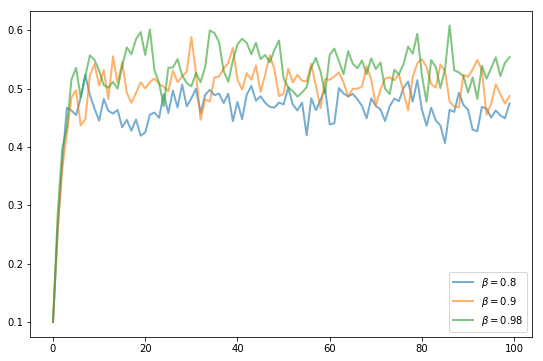

In [12]:

Image("solution_og_ex2.png", width=500)


In each sequence, the initial condition is $ y_0 = 0.1 $

The discount factors are discount_factors = (0.8, 0.9, 0.98)

We have also dialed down the shocks a bit

In [13]:
s = 0.05
shocks = np.exp(mu + s * np.random.randn(shock_size))

Otherwise, the parameters and primitives are the same as the log linear model discussed earlier in the lecture

Notice that more patient agents typically have higher wealth

Replicate the figure modulo randomness

## Solutions

### Solution to Exercise 1

Here's our solution, which assumes you've executed the code in the lecture

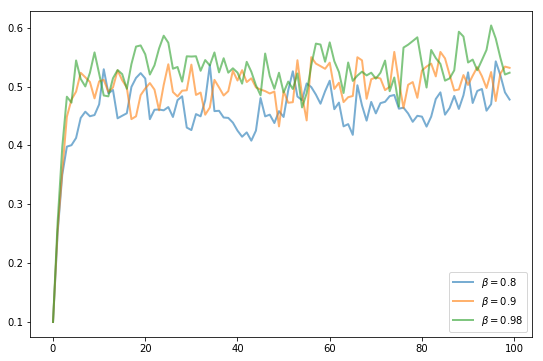

In [14]:
def simulate_og(sigma, y0 = 0.1, ts_length=100):
    '''
    Compute a time series given consumption policy sigma.
    '''
    y = np.empty(ts_length)
    xi = np.random.randn(ts_length)
    y[0] = y0
    for t in range(ts_length-1):
        y[t+1] = (y[t] - sigma(y[t]))**alpha * np.exp(mu + s * xi[t+1])
    return y

fig, ax = plt.subplots(figsize=(9, 6))

for beta in (0.8, 0.9, 0.98):

    Tw = np.empty(len(grid))
    initial_w = 5 * np.log(grid)

    v_star_approx = compute_fixed_point(bellman_operator,
                                        initial_w,
                                        1e-5,  # error_tol
                                        500,   # max_iter
                                        False,  # verbose
                                        5,     # print_skip
                                        'iteration',
                                        grid,
                                        beta,
                                        np.log,
                                        lambda k: k**alpha,
                                        shocks,
                                        Tw=Tw,
                                        compute_policy=False)

    Tw, sigma = bellman_operator(v_star_approx,
                            grid,
                            beta,
                            np.log,
                            lambda k: k**alpha,
                            shocks,
                            compute_policy=True)

    sigma_func = lambda x: np.interp(x, grid, sigma)
    y = simulate_og(sigma_func)
    ax.plot(y, lw=2, alpha=0.6, label=r'$\beta = {}$'.format(beta))


ax.legend(loc='lower right')
plt.show()